## RNN Exploration

In [1]:
from fastai.text import *

In [2]:
bs=64
path=untar_data(URLs.HUMAN_NUMBERS)
path.ls()

[PosixPath('/Users/seth/.fastai/data/human_numbers/train.txt'),
 PosixPath('/Users/seth/.fastai/data/human_numbers/valid.txt')]

In [3]:
def readnums(d):
    return [', '.join(o.strip() for o in open(path/d).readlines())]

In [5]:
train_text = readnums('train.txt')
train_text[0][:80]

'one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirt'

In [6]:
valid_text = readnums('valid.txt')
valid_text[0][-80:]

' nine thousand nine hundred ninety eight, nine thousand nine hundred ninety nine'

In [13]:
train = TextList(train_text, path=path)
valid = TextList(valid_text, path=path)

src = ItemLists(path=path, train=train, valid=valid).label_for_lm()

In [15]:
type(src)

fastai.data_block.LabelLists

In [16]:
data = src.databunch(bs=bs)

In [18]:
type(data)

fastai.text.data.TextLMDataBunch

In [24]:
train[0].text[:80]

'xxbos one , two , three , four , five , six , seven , eight , nine , ten , eleve'

In [25]:
data.bptt

70

In [26]:
len(data.valid_dl)

3

In [27]:
it = iter(data.valid_dl)
x1,y1 = next(it)
x2,y2 = next(it)
x3,y3 = next(it)
it.close()

In [28]:
x1

tensor([[ 2, 19, 11,  ..., 36,  9, 19],
        [ 9, 19, 11,  ..., 24, 20,  9],
        [11, 27, 18,  ...,  9, 19, 11],
        ...,
        [20, 11, 20,  ..., 11, 20, 10],
        [20, 11, 20,  ..., 24,  9, 20],
        [20, 10, 26,  ..., 20, 11, 20]])

In [29]:
y1

tensor([[19, 11, 12,  ...,  9, 19, 11],
        [19, 11, 23,  ..., 20,  9, 19],
        [27, 18,  9,  ..., 19, 11, 12],
        ...,
        [11, 20, 10,  ..., 20, 10, 21],
        [11, 20, 10,  ...,  9, 20, 11],
        [10, 26,  9,  ..., 11, 20, 10]])

In [32]:
x1.numel()

4480

In [34]:
x1.shape, y1.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [35]:
x2.shape, y2.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [36]:
x3.shape, y3.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [41]:
v = data.valid_ds.vocab
v.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',',
 'hundred',
 'thousand',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine',
 'twenty',
 'thirty',
 'forty',
 'fifty',
 'sixty',
 'seventy',
 'eighty',
 'ninety',
 'ten',
 'eleven',
 'twelve',
 'thirteen',
 'fourteen',
 'fifteen',
 'sixteen',
 'seventeen',
 'eighteen',
 'nineteen',
 'xxfake']

In [44]:
doc(v.textify)

textify [source] [test] textify ( nums : Collection [ int ], sep = ' ' ) → List [ str ] 
 
 × Tests found for textify : pytest -sv tests/test_text_transform.py::test_numericalize_and_textify [source] To run tests please refer to this guide . Convert a list of nums to their tokens. 
 Show in docs

In [48]:
v.textify(x3[0])

'eight thousand thirty three , eight thousand thirty four , eight thousand thirty five , eight thousand thirty six , eight thousand thirty seven , eight thousand thirty eight , eight thousand thirty nine , eight thousand forty , eight thousand forty one , eight thousand forty two , eight thousand forty three , eight thousand forty four , eight thousand forty five , eight thousand forty six , eight'

In [51]:
data.show_batch(ds_type=DatasetType.Train)

idx,text
0,"thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight , thirty nine , forty , forty one , forty two , forty three , forty four , forty five , forty six , forty seven , forty eight , forty nine , fifty , fifty one , fifty two , fifty three , fifty four ,"
1,"twenty six , two hundred twenty seven , two hundred twenty eight , two hundred twenty nine , two hundred thirty , two hundred thirty one , two hundred thirty two , two hundred thirty three , two hundred thirty four , two hundred thirty five , two hundred thirty six , two hundred thirty seven , two hundred thirty eight , two hundred thirty nine , two hundred forty"
2,", three hundred ninety , three hundred ninety one , three hundred ninety two , three hundred ninety three , three hundred ninety four , three hundred ninety five , three hundred ninety six , three hundred ninety seven , three hundred ninety eight , three hundred ninety nine , four hundred , four hundred one , four hundred two , four hundred three , four hundred four , four"
3,"fifty seven , five hundred fifty eight , five hundred fifty nine , five hundred sixty , five hundred sixty one , five hundred sixty two , five hundred sixty three , five hundred sixty four , five hundred sixty five , five hundred sixty six , five hundred sixty seven , five hundred sixty eight , five hundred sixty nine , five hundred seventy , five hundred seventy one"
4,", seven hundred twenty five , seven hundred twenty six , seven hundred twenty seven , seven hundred twenty eight , seven hundred twenty nine , seven hundred thirty , seven hundred thirty one , seven hundred thirty two , seven hundred thirty three , seven hundred thirty four , seven hundred thirty five , seven hundred thirty six , seven hundred thirty seven , seven hundred thirty eight ,"


In [99]:
data = src.databunch(bs=bs, bptt=3)
x,y = data.one_batch()
x.shape, y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [100]:
nv = len(v.itos)
nv

40

In [101]:
nh = 64
def loss4(input,target): return F.cross_entropy(input, target[:,-1])
def acc4 (input,target): return accuracy(input, target[:,-1])

In [102]:
x[:,0]

tensor([13, 13, 10,  9, 18,  9, 11, 11, 13, 19, 16, 23, 24,  9, 12,  9, 13, 14,
        15, 11, 10, 22, 15,  9, 10, 14, 11, 16, 10, 28, 11,  9, 20,  9, 15, 15,
        11, 18, 10, 28, 23, 24,  9, 16, 10, 16, 19, 20, 12, 10, 22, 16, 17, 17,
        17, 11, 24, 10,  9, 15, 16,  9, 18, 11])

In [103]:
doc(Learner)

class Learner [source] [test] Learner ( data : DataBunch , model : Module , opt_func : Callable = 'Adam' , loss_func : Callable = None , metrics : Collection [ Callable ]= None , true_wd : bool = True , bn_wd : bool = True , wd : Floats = 0.01 , train_bn : bool = True , path : str = None , model_dir : PathOrStr = 'models' , callback_fns : Collection [ Callable ]= None , callbacks : Collection [ Callback ]= <factory> , layer_groups : ModuleList = None , add_time : bool = True , silent : bool = None ) 
 
 × No tests found for Learner . To contribute a test please refer to this guide and this discussion . Trainer for model using data to minimize loss_func with optimizer opt_func . 
 Show in docs

In [104]:
doc(nn.Module)

class Module [test] Module () 
 
 × No tests found for Module . To contribute a test please refer to this guide and this discussion . Base class for all neural network modules. Your models should also subclass this class. 
 Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes:: 

 import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
 def __init__(self):
 super(Model, self).__init__()
 self.conv1 = nn.Conv2d(1, 20, 5)
 self.conv2 = nn.Conv2d(20, 20, 5)

 def forward(self, x):
 x = F.relu(self.conv1(x))
 return F.relu(self.conv2(x))

 
 Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth: to , etc.

In [105]:
# Some of the PyTorch items imported by fastai
#
# import torch.nn as nn
# import torch.nn.functional as F

In [106]:
class model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Embedding(nv, nh)
        self.hidden_to_hidden = nn.Linear(nh, nh)
        self.hidden_to_output = nn.Linear(nh, nv)
        self.batch_norm = nn.BatchNorm1d(nh)
    
    def forward(self, x):
        h = self.batch_norm(F.relu(self.input_to_hidden(x[:,0])))
        if x.shape[1]>1:
            h = h + self.input_to_hidden(x[:,1])
            h = self.batch_norm(F.relu(self.hidden_to_hidden(h)))
        if x.shape[1]>2:
            h = h + self.input_to_hidden(x[:,2])
            h = self.batch_norm(F.relu(self.hidden_to_hidden(h)))
        return self.hidden_to_output(h)

In [107]:
learn = Learner(data, model0(), loss_func=loss4, metrics=acc4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


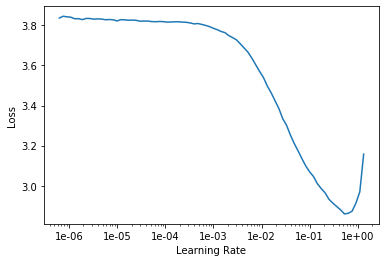

In [108]:
learn.lr_find()
learn.recorder.plot()

In [109]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,acc4,time
0,3.667761,3.531254,0.078814,00:01
1,2.814822,2.791522,0.414062,00:01
2,2.183983,2.328996,0.445312,00:01
3,1.946204,2.186933,0.453585,00:01
4,1.861380,2.147786,0.453585,00:01
5,1.843547,2.142916,0.453585,00:01


In [110]:
class model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Embedding(nv, nh)
        self.hidden_to_hidden = nn.Linear(nh, nh)
        self.hidden_to_output = nn.Linear(nh, nv)
        self.batch_norm = nn.BatchNorm1d(nh)
    
    def forward(self, x):
        h = torch.zeros(x.shape[0], nh).to(device=x.device)
        for i in range(x.shape[1]):
            h = h + self.input_to_hidden(x[:,i])
            h = self.batch_norm(F.relu(self.hidden_to_hidden(h)))
        return self.hidden_to_output(h)

In [111]:
learn = Learner(data, model1(), loss_func=loss4, metrics=acc4)
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,acc4,time
0,3.549961,3.511919,0.078355,00:01
1,2.686883,2.686828,0.396829,00:01
2,2.084798,2.187654,0.461167,00:01
3,1.865167,2.039938,0.466452,00:01
4,1.788918,2.002010,0.466452,00:01
5,1.772805,1.997374,0.465074,00:01


In [136]:
data = src.databunch(bs=bs, bptt=3)

In [137]:
x,y = data.one_batch()
x.shape, y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [138]:
doc(nn.Linear)

class Linear [test] Linear ( in_features , out_features , bias = True ) :: Module 
 
 × No tests found for Linear . To contribute a test please refer to this guide and this discussion . Applies a linear transformation to the incoming data: :math: y = xA^T + b Args:
 in_features: size of each input sample
 out_features: size of each output sample
 bias: If set to False , the layer will not learn an additive bias.
 Default: True 
 Shape: 

 - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
 additional dimensions and :math:`H_{in} = \text{in\_features}`
- Output: :math:`(N, *, H_{out})` where all but the last dimension
 are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

 
 Attributes:
 weight: the learnable weights of the module of shape
 :math: (\text{out\_features}, \text{in\_features}) . The values are
 initialized from :math: \mathcal{U}(-\sqrt{k}, \sqrt{k}) , where
 :math: k = \frac{1}{\text{in\_features}} 
 bias: the learnable bias of the module of shape :math: (\text{out\_features}) .
 If :attr: bias is True , the values are initialized from
 :math: \mathcal{U}(-\sqrt{k}, \sqrt{k}) where
 :math: k = \frac{1}{\text{in\_features}} 
 Examples:: 

 >>> m = nn.Linear(20, 30)
>>> input = torch.randn(128, 20)
>>> output = m(input)
>>> print(output.size())
torch.Size([128, 30])

In [139]:
class model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Embedding(nv, nh)
        self.hidden_to_hidden = nn.Linear(nh, nh)
        self.hidden_to_output = nn.Linear(nh, nv)
        self.batch_norm = nn.BatchNorm1d(nh)
        
    def forward(self, x):
        h = torch.zeros(x.shape[0], nh).to(device=x.device)
        res = []
        for i in range(x.shape[1]):
            h = h + self.input_to_hidden(x[:,i])
            h = F.relu(self.hidden_to_hidden(h))
            res.append(self.hidden_to_output(self.batch_norm(h)))
        return torch.stack(res, dim=1)

In [143]:
learn = Learner(data, model2(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


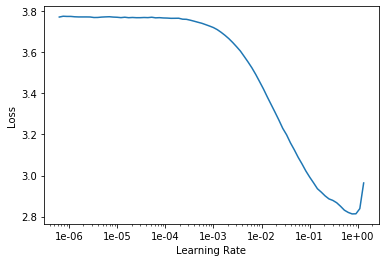

In [141]:
learn.lr_find()
learn.recorder.plot()

In [144]:
learn.fit_one_cycle(10, 1e-5, pct_start=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,3.744786,3.799604,0.028569,00:01
1,3.577123,3.677436,0.060815,00:02
2,3.428809,3.574174,0.091988,00:01
3,3.306312,3.490465,0.104856,00:01
4,3.210693,3.426391,0.138097,00:01
5,3.141183,3.380979,0.166513,00:01
6,3.095660,3.351855,0.176394,00:01
7,3.069980,3.336144,0.181985,00:01
8,3.059204,3.330254,0.185049,00:01
9,3.056988,3.329405,0.185049,00:01


In [168]:
bs

64

In [156]:
class model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Embedding(nv, nh)
        self.hidden_to_hidden = nn.Linear(nh, nh)
        self.hidden_to_output = nn.Linear(nh, nv)
        self.batch_norm = nn.BatchNorm1d(nh)
        self.h = torch.zeros(bs, nh).to(device=x.device)
        
    def forward(self, x):
        res = []
        h = self.h
        for i in range(x.shape[1]):
            h = h + self.input_to_hidden(x[:,i])
            h = F.relu(self.hidden_to_hidden(h))
            res.append(self.batch_norm(h))
        self.h = h.detach()
        res = torch.stack(res, dim=1)
        res = self.hidden_to_output(res)
        return res

In [175]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)
        self.h_h = nn.Linear(nh,nh)
        self.h_o = nn.Linear(nh,nv)
        self.bn = nn.BatchNorm1d(nh)
        self.h = torch.zeros(bs, nh).to(device=x.device)
        
    def forward(self, x):
        res = []
        h = self.h
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
            res.append(self.bn(h))
        self.h = h.detach()
        res = torch.stack(res, dim=1)
        res = self.h_o(res)
        return res

In [176]:
learn = Learner(data, Model3(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


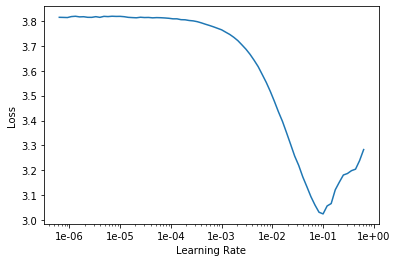

In [177]:
learn.lr_find()
learn.recorder.plot()

In [178]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.000000,00:01
1,nan,nan,0.000000,00:01
2,nan,nan,0.000000,00:01
3,nan,nan,0.000000,00:01
4,nan,nan,0.000000,00:01
5,nan,nan,0.000000,00:01
6,nan,nan,0.000000,00:01
7,nan,nan,0.000000,00:01
8,nan,nan,0.000000,00:01
9,nan,nan,0.000000,00:01
